In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.subplots as sp
import plotly.graph_objects as go

In [2]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [3]:
HR_Ratings=pd.read_csv('HR_Ratings_Clean.csv')
Emp_merge=pd.read_csv('Emp_merge_Clean.csv')

In [4]:
HR_Ratings.sample(10)

EmployeeID PerformanceID             FullName  ReviewDate  Age  \
5655  EAB1-2EB2         PR241      Giacinta Keasey  2014-03-07   21   
1364  59DB-8465        PR2296  Nancey Luetkemeyers  2018-05-02   47   
4607  7839-CA12        PR4561     Orella Chappelle  2021-01-10   23   
536   C0A1-EB7D        PR1385        Leona McKnish  2017-01-04   36   
3510  A76C-AEB3        PR6513         Oren Milella  2022-10-23   25   
1218  022A-0219        PR4327      Francine Fernez  2020-10-07   32   
3530  95CB-4E31        PR6180        Pavlov Pretor  2022-06-23   28   
1021  D199-1896         PR788            Lin Dibbs  2015-10-27   42   
3338  8EA4-9179        PR3855      Cristian Dignum  2020-04-08   25   
1637  2523-EFD4        PR3980         Vanny Ruggen  2020-05-17   34   

          BusinessTravel       Department Attrition  EnvironmentSatisfaction  \
5655         Some Travel       Technology       Yes                        4   
1364  Frequent Traveller  Human Resources        No                        4   
4607         Some Travel            Sales       Yes                        3   
536          Some Travel       Technology        No                        4   
3510         Some Travel       Technology        No                        4   
1218  Frequent Traveller       Technology        No                        4   
3530          No Travel        Technology        No                        5   
1021         Some Travel            Sales        No                        4   
3338         Some Travel       Technology        No                        4   
1637         Some Travel       Technology        No                        4   

      JobSatisfaction  RelationshipSatisfaction RelationshipSatisfaction_text  \
5655                3                         4                     Satisfied   
1364                5                         4                     Satisfied   
4607                5                         4                     Satisfied   
536                 5                         4                     Satisfied   
3510                5                         3                       Neutral   
1218                3                         5                Very Satisfied   
3530                2                         3                       Neutral   
1021                4                         4                     Satisfied   
3338                3                         3                       Neutral   
1637                2                         4                     Satisfied   

     EnvironmentSatisfaction_text JobSatisfaction_text  \
5655                    Satisfied              Neutral   
1364                    Satisfied       Very Satisfied   
4607                      Neutral       Very Satisfied   
536                     Satisfied       Very Satisfied   
3510                    Satisfied       Very Satisfied   
1218                    Satisfied              Neutral   
3530               Very Satisfied         Dissatisfied   
1021                    Satisfied            Satisfied   
3338                    Satisfied              Neutral   
1637                    Satisfied         Dissatisfied   

      TrainingOpportunitiesWithinYear  WorkLifeBalance  ManagerRating  \
5655                                3                5              4   
1364                                2                2              3   
4607                                3                3              3   
536                                 1                5              3   
3510                                1                2              3   
1218                                3                4              4   
3530                                2                5              4   
1021                                1                2              5   
3338                                3                3              2   
1637                                3                4              3   

      S

In [5]:
HR_Ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6709 entries, 0 to 6708
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   EmployeeID                       6709 non-null   object
 1   PerformanceID                    6709 non-null   object
 2   FullName                         6709 non-null   object
 3   ReviewDate                       6709 non-null   object
 4   Age                              6709 non-null   int64 
 5   BusinessTravel                   6709 non-null   object
 6   Department                       6709 non-null   object
 7   Attrition                        6709 non-null   object
 8   EnvironmentSatisfaction          6709 non-null   int64 
 9   JobSatisfaction                  6709 non-null   int64 
 10  RelationshipSatisfaction         6709 non-null   int64 
 11  RelationshipSatisfaction_text    6709 non-null   object
 12  EnvironmentSatisfaction_text     6

In [4]:
Emp_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   EmployeeID               1470 non-null   object
 1   Gender                   1470 non-null   object
 2   Age                      1470 non-null   int64 
 3   BusinessTravel           1470 non-null   object
 4   Department               1470 non-null   object
 5   DistanceFromHome (KM)    1470 non-null   int64 
 6   State                    1470 non-null   object
 7   Ethnicity                1470 non-null   object
 8   EducationField           1470 non-null   object
 9   JobRole                  1470 non-null   object
 10  MaritalStatus            1470 non-null   object
 11  Salary                   1470 non-null   int64 
 12  StockOptionLevel         1470 non-null   int64 
 13  OverTime                 1470 non-null   object
 14  Attrition                1470 non-null  

In [5]:
Emp_merge.sample(10)

EmployeeID  Gender  Age      BusinessTravel       Department  \
582   757F-78FE    Male   25          No Travel        Technology   
377   B6EC-313E    Male   26  Frequent Traveller  Human Resources   
1024  A0EC-C4AE  Female   24         Some Travel            Sales   
1443  39A2-9B0A  Female   19  Frequent Traveller            Sales   
1217  617A-5092    Male   39          No Travel        Technology   
346   9CE9-B0D5    Male   33         Some Travel       Technology   
93    5222-EBE1    Male   30         Some Travel       Technology   
883   1914-B934  Female   22  Frequent Traveller            Sales   
193   F838-C681    Male   32         Some Travel       Technology   
469   E430-E462    Male   28         Some Travel       Technology   

      DistanceFromHome (KM) State                        Ethnicity  \
582                      32    NY  Mixed or multiple ethnic groups   
377                      17    CA  Mixed or multiple ethnic groups   
1024                      7    NY                            White   
1443                     35    CA                            White   
1217                     30    CA                            White   
346                      31    CA                            White   
93                       14    CA          Asian or Asian American   
883                      19    NY  Mixed or multiple ethnic groups   
193                      22    IL        Black or African American   
469                      38    IL                            White   

           EducationField                    JobRole  ...  Salary  \
582   Information Systems  Machine Learning Engineer  ...   52614   
377       Human Resources                  Recruiter  ...   30502   
1024            Marketing            Sales Executive  ...  106586   
1443            Marketing       Sales Representative  ...   24959   
1217     Computer Science   Senior Software Engineer  ...  152771   
346   Information Systems             Data Scientist  ...   60754   
93       Computer Science  Machine Learning Engineer  ...  194823   
883             Marketing       Sales Representative  ...   22122   
193      Business Studies          Software Engineer  ...   72688   
469   Information Systems   Senior Software Engineer  ...  194982   

      StockOptionLevel  OverTime Attrition YearsAtCompany  \
582                  1        No        No              6   
377                  1        No       Yes              0   
1024                 1        No        No              3   
1443                 1        No       Yes              0   
1217                 1        No        No              1   
346                  1        No        No              8   
93                   1        No        No             10   
883                  0       Yes       Yes              3   
193                  1        No        No              9   
469                  1        No        No              7   

      YearsInMostRecentRole  YearsSinceLastPromotion  YearsWithCurrManager  \
582                       4                        5                     1   
377                       0                        0                     0   
1024                      1                        3                     3   
1443                      0                        0                     0   
1217                      1                        1                     1   
346                       7                        8                     1   
93                        4                        9                     8   
883                       2                        2                     1   
193                       3                        3                     8   
469                       2                        7                     2   

                EducationLevel       AgeGroup  
582                   Masters   Below_Average  
377                 Bachelors   Below_Average  
1024                Bachelors   Below_A

In [6]:
Emp_merge.describe(include="O")

EmployeeID  Gender BusinessTravel  Department State Ethnicity  \
count        1470    1470           1470        1470  1470      1470   
unique       1470       4              3           3     3         7   
top     3012-1A41  Female    Some Travel  Technology    CA     White   
freq            1     675           1043         961   875       860   

          EducationField          JobRole MaritalStatus OverTime Attrition  \
count               1470             1470          1470     1470      1470   
unique                 8               13             3        2         2   
top     Computer Science  Sales Executive       Married       No        No   
freq                 440              327           624     1054      1233   

       EducationLevel       AgeGroup  
count            1470           1470  
unique              5              2  
top        Bachelors   Below_Average  
freq              572            909

In [9]:
px.box(data_frame=Emp_merge , x ="Salary")

In [10]:
px.histogram(data_frame=Emp_merge , x ="Salary")

In [11]:
Emp_merge['Salary'].mean()

112956.49795918367

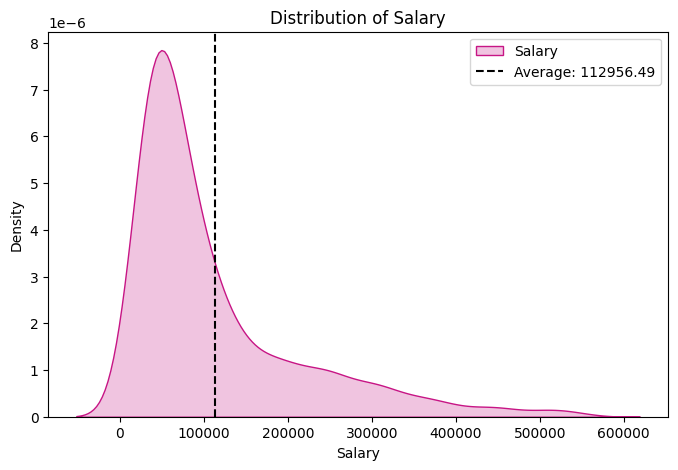

In [12]:
# What is the Salary distribution all Employees?
plt.figure(figsize=(8,5))
sns.kdeplot(x=Emp_merge['Salary'],color='MediumVioletRed',fill=True,label='Salary')
plt.axvline(x=Emp_merge['Salary'].mean(),color='k',linestyle ="--",label='Average: 112956.49')
plt.xlabel('Salary')
plt.legend()
plt.title('Distribution of Salary')
plt.show()

In [13]:
Emp_merge['Age'].mean()

28.989795918367346

In [14]:
px.box(data_frame=Emp_merge , x ="Age")

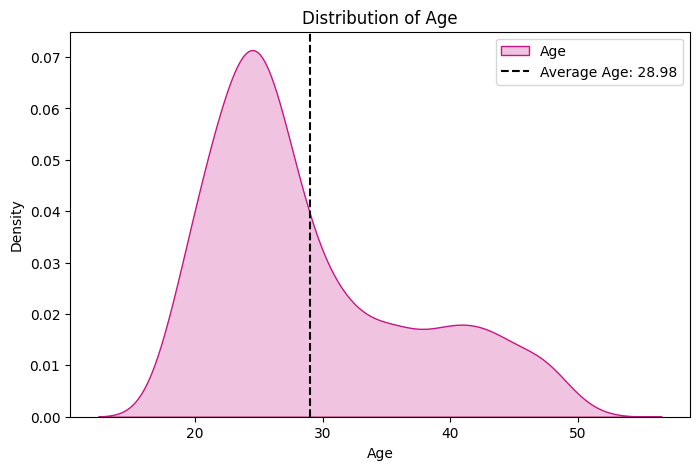

In [15]:
# What is the Age distribution in all Employees?
plt.figure(figsize=(8,5))
sns.kdeplot(x=Emp_merge['Age'],color='MediumVioletRed',fill=True,label='Age')
plt.axvline(x=Emp_merge['Age'].mean(),color='k',linestyle ="--",label='Average Age: 28.98')
plt.legend()
plt.title('Distribution of Age')
plt.show()

In [16]:
#what is the number of employees equal to or greater than Average(29)?
Emp_merge[Emp_merge['Age'] >= 29 ]['Age'].count()

561

In [17]:
#what is the number of employees below Average(29)?
Emp_merge[Emp_merge['Age'] < 29 ]['Age'].count()

909

In [9]:
# What is the Percentage of Employees Relative to Average Age (29)?
average_age = Emp_merge["Age"].mean()
below_avg = Emp_merge[Emp_merge['Age'] < average_age]
above_avg = Emp_merge[Emp_merge['Age'] >= average_age]
fig = px.pie  (names= ["# Employees Below Average Age", "# Employees Above Average Age"],
              values=[below_avg.shape[0], above_avg.shape[0]],
              title="Percentage of Employees Relative to Average Age >> 29",
              hole=.5)

fig.update_layout(width=600, height=400)  # Set suitable size for each figure
fig.show()

In [12]:
# What is the Percentage of Attrition based on AgeGroup?
fig = px.histogram(data_frame=Emp_merge, x='AgeGroup',
                   color='Attrition',
                   barmode='group', barnorm='percent',
                   color_discrete_map={'No': 'green', 'Yes': 'darkred'},
                   text_auto="0.3s")
fig.update_layout(width=400, height=400)  # Set suitable size for each figure
fig.show()

In [21]:
below_avg = Emp_merge[Emp_merge['Age'] < average_age]
above_avg = Emp_merge[Emp_merge['Age'] >= average_age]
agegroup_attrition_counts = Emp_merge.groupby(['AgeGroup', 'Attrition']).size().unstack(fill_value=0)

# Plot pie charts for each AgeGroup using Plotly
for age_group in agegroup_attrition_counts.index:
    fig = px.pie(values=agegroup_attrition_counts.loc[age_group], names=agegroup_attrition_counts.columns, 
                 title=f'Attrition for {age_group} Age Group', hole=0.3)
    fig.update_layout(width=400, height=400)  # Set suitable size for each figure
    fig.show()

In [22]:
# What is the distribution of Attrition in all Employees?
Emp_merge.groupby('Attrition')['EmployeeID'].count().to_frame().rename(columns={'EmployeeID':'Count'})

Count
Attrition       
No          1233
Yes          237

In [19]:
# What is the Percentage of Attrition in all Employees?
fig = px.pie(   names= ["Yes", "No"],
                values=[Emp_merge[Emp_merge['Attrition']=='Yes'].shape[0],
                        Emp_merge[Emp_merge['Attrition']=='No' ].shape[0]],
                
                title='Percentage of Attrition in all Employees',hole=.5)

fig.update_layout(width=400, height=400)  # Set suitable size for each figure
fig.show()

In [24]:
# What is the distribution of Attrition in all Employees?
px.histogram(data_frame=Emp_merge,  x='Attrition', text_auto="0.3s")

In [25]:
Emp_merge['Attrition'].describe()

count     1470
unique       2
top         No
freq      1233
Name: Attrition, dtype: object

In [26]:
# What is the distribution of Attrition in different Genders?
Emp_merge.groupby(['Gender','Attrition'])['EmployeeID'].count().to_frame().rename(columns={'EmployeeID':'Count'})

Count
Gender            Attrition       
Female            No           571
                  Yes          104
Male              No           537
                  Yes          114
Non-Binary        No           105
                  Yes           19
Prefer Not To Say No            20

In [27]:
# What is the percentage of Attrition in different Genders?
fig = px.histogram(data_frame=Emp_merge, x='Gender',
                   color='Attrition', 
                   barmode='group', barnorm='percent',
                   color_discrete_map={'No': 'green', 'Yes': 'darkred'},
                   text_auto="0.3s")
fig.update_layout(width=600, height=400)  # Set suitable size for each figure
fig.show()

In [31]:
# What is the Attrition based on Age?
fig=px.box(Emp_merge,x='Age',color='Attrition',template='simple_white',color_discrete_sequence=['LightCoral','DeepSkyBlue'])
fig.update_traces(marker=dict(line=dict(color='#000000', width=0.5)))
fig.update_xaxes(visible=True)
fig.update_yaxes(visible=True)
fig.update_layout(title_x=0.5,template='simple_white',showlegend=True,title_text='<b style="color:black; font-size:105%;">Employee Attrition based on Age</b>',font_family="Times New Roman",title_font_family="Times New Roman")
fig.show()

In [33]:
# What is the Attrition based on Age in different Genders?
fig=px.box(Emp_merge,x='Gender',y='Age',color='Attrition',template='simple_white',color_discrete_sequence=['LightCoral','DeepSkyBlue'])
fig.update_traces(marker=dict(line=dict(color='#000000', width=0.5)))
fig.update_xaxes(visible=True)
fig.update_yaxes(visible=True)
fig.update_layout(title_x=0.5,template='simple_white',showlegend=True,title_text='<b style="color:black; font-size:105%;">Employee Attrition based on Age and Gender</b>',font_family="Times New Roman",title_font_family="Times New Roman")
fig.show()

In [34]:
# What is the Attrition based on salary ?
fig=px.box(Emp_merge,x='Salary',color='Attrition',template='simple_white',color_discrete_sequence=['LightCoral','DeepSkyBlue'])
fig.update_xaxes(visible=True)
fig.update_yaxes(visible=True)
fig.update_layout(title_x=0.5,template='simple_white',showlegend=True,title_text='<b style="color:black; font-size:105%;">Employee Attrition based on Salary</b>',font_family="Times New Roman",title_font_family="Times New Roman")
fig.show()

In [35]:
# What is the Attrition based on salary and gender?
fig=px.box(Emp_merge,x='Salary',y='Gender',color='Attrition',template='simple_white',color_discrete_sequence=['LightCoral','DeepSkyBlue'])
fig.update_xaxes(visible=True)
fig.update_yaxes(visible=True)
fig.update_layout(title_x=0.5,template='simple_white',showlegend=True,title_text='<b style="color:black; font-size:105%;">Employee Attrition based on Salary and Gender</b>',font_family="Times New Roman",title_font_family="Times New Roman")
fig.show()

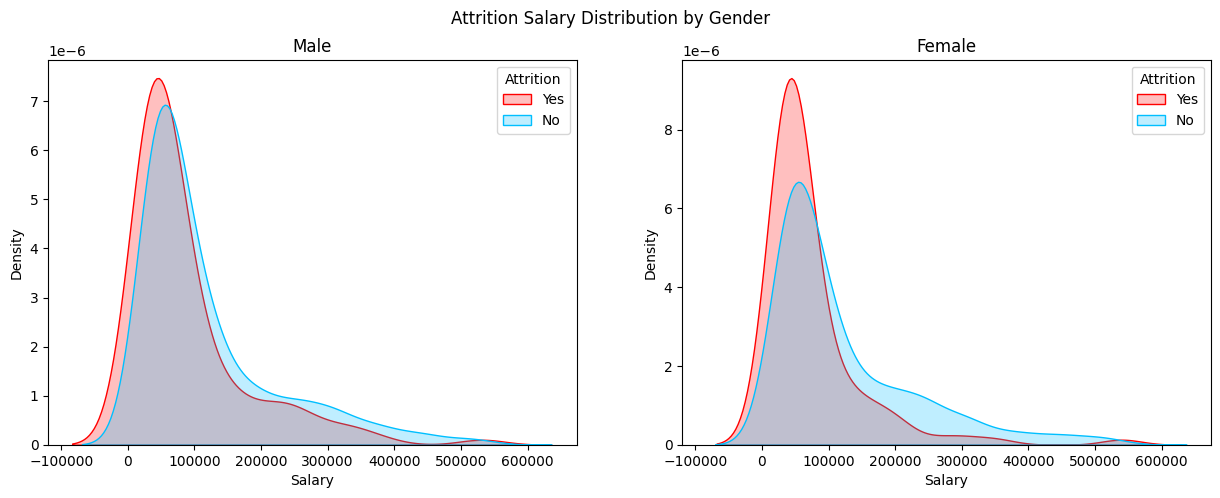

In [36]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,5))
fig.suptitle('Attrition Salary Distribution by Gender')
sns.kdeplot(ax=axes[0],x=Emp_merge[(Emp_merge['Gender']=='Male')&(Emp_merge['Attrition']=='Yes')]['Salary'], color='r', fill=True, label='Yes')
sns.kdeplot(ax=axes[0],x=Emp_merge[(Emp_merge['Gender']=='Male')&(Emp_merge['Attrition']=='No')]['Salary'], color='#00BFFF', fill=True, label='No')
axes[0].set_title('Male')
axes[0].legend(title='Attrition')
sns.kdeplot(ax=axes[1],x=Emp_merge[(Emp_merge['Gender']=='Female')&(Emp_merge['Attrition']=='Yes')]['Salary'], color='r', fill=True, label='Yes')
sns.kdeplot(ax=axes[1],x=Emp_merge[(Emp_merge['Gender']=='Female')&(Emp_merge['Attrition']=='No')]['Salary'], color='#00BFFF', fill=True, label='No')
axes[1].set_title('Female')
axes[1].legend(title='Attrition')
plt.show()

In [37]:
# What is the distribution of Attrition in different Job Roles?
Emp_merge.groupby(['JobRole','Attrition'])['EmployeeID'].count().to_frame().rename(columns={'EmployeeID':'Count'})

Count
JobRole                   Attrition       
Analytics Manager         No            49
                          Yes            3
Data Scientist            No           199
                          Yes           62
Engineering Manager       No            73
                          Yes            2
HR Business Partner       No             7
HR Executive              No            25
                          Yes            3
HR Manager                No             4
Machine Learning Engineer No           136
                          Yes           10
Manager                   No            35
                          Yes            2
Recruiter                 No            15
                          Yes            9
Sales Executive           No           270
                          Yes           57
Sales Representative      No            50
                          Yes           33
Senior Software Engineer  No           123
                          Yes            9
Software Engineer         No           247
                          Yes           47

In [38]:
# What is the percentage of Attrition in different Job Roles?

# Calculate the number of "Yes" in the Attrition column for each JobRole
job_role_yes_percentage = Emp_merge[Emp_merge['Attrition'] == 'Yes']['JobRole'].value_counts() / Emp_merge['JobRole'].value_counts() * 100

# Sort JobRole in descending order by the number of "Yes" in the Attrition column
sorted_job_roles = job_role_yes_percentage.sort_values(ascending=False).index

px.histogram(data_frame=Emp_merge, x='JobRole', color='Attrition', 
             barmode='group', barnorm='percent',
             category_orders={'JobRole': sorted_job_roles},
             color_discrete_map={'No': 'green', 'Yes': 'darkred'})

In [21]:
# Group by JobRole and Attrition, and count the occurrences
job_attrition_counts = Emp_merge.groupby(['JobRole', 'Attrition']).size().unstack(fill_value=0)

# Calculate the percentage of Yes and No for each JobRole
job_attrition_percentage = job_attrition_counts.div(job_attrition_counts.sum(axis=1), axis=0) * 100

# Plot pie charts for each JobRole using Plotly
for job_role in job_attrition_percentage.index:
    fig = px.pie(values=job_attrition_percentage.loc[job_role], names=job_attrition_percentage.columns, title=f'Attrition Percentage for {job_role}', hole=0.3)
    fig.update_layout(width=500, height=400)  # Set suitable size for each figure
    fig.show()


In [25]:
# Group by JobRole and Attrition, and count the occurrences
job_attrition_counts = Emp_merge.groupby(['JobRole', 'Attrition']).size().unstack(fill_value=0)

# Calculate the percentage of Yes and No for each JobRole
job_attrition_percentage = job_attrition_counts.div(job_attrition_counts.sum(axis=1), axis=0) * 100

# Create a subplot figure with 3 rows and 5 columns (adjust based on the number of job roles)
fig = sp.make_subplots(rows=3, cols=5, specs=[[{'type': 'domain'}]*5]*3, subplot_titles=job_attrition_percentage.index)

# Add pie charts to each subplot
row, col = 1, 1
for i, job_role in enumerate(job_attrition_percentage.index):
    fig.add_trace(go.Pie(labels=job_attrition_percentage.columns, values=job_attrition_percentage.loc[job_role], name=job_role), row=row, col=col)
    col += 1
    if col > 5:
        col = 1
        row += 1

# Update layout
fig.update_layout(title_text='Attrition Percentage for Each JobRole', height=1200)

# Show the figure
fig.show()


In [41]:
Emp_merge['DistanceFromHome (KM)'].unique()

array([27, 23, 29, 12, 30, 45,  3, 20,  4, 42,  8, 35, 21, 34, 19,  1, 17,
       36, 37, 41, 25, 44, 22, 40, 14, 15,  7,  5, 31,  9, 13, 38, 16, 39,
       28, 32,  2,  6, 11, 33, 26, 43, 10, 18, 24], dtype=int64)

In [43]:
fig = px.box(data_frame=Emp_merge, x='Attrition', y='DistanceFromHome (KM)', color='Attrition',
                title='Effect of Distance From Home on Attrition',
                labels={'DistanceFromHome (KM)': 'Distance From Home (KM)', 'Attrition': 'Attrition'},
                color_discrete_map={'No': 'green', 'Yes': 'darkred'})
fig.update_layout(width=600, height=400)  # Set suitable size for each figure
fig.show()

In [26]:
# Filter the DataFrame for the "Yes" category in Attrition
yes = Emp_merge[Emp_merge['Attrition'] == 'Yes']

# Plot a histogram for the distances of the "Yes" category
fig =  px.histogram(data_frame=yes, x='DistanceFromHome (KM)', nbins=20, 
                    title='Distribution of Distance From Home for Employees Who Left',
                    labels={'DistanceFromHome (KM)': 'Distance From Home (KM)'})
fig.update_layout(width=600, height=400)  # Set suitable size for each figure
fig.show()


In [45]:
# What is the distribution of Attrition in different Departments?
Emp_merge.groupby(['Department','Attrition'])['EmployeeID'].count().to_frame().rename(columns={'EmployeeID':'Count'})

Count
Department      Attrition       
Human Resources No            51
                Yes           12
Sales           No           354
                Yes           92
Technology      No           828
                Yes          133

In [46]:
# What is the percentage of Attrition in different Departments?
fig =  px.histogram(data_frame=Emp_merge, x='Department', color='Attrition', 
                    barmode='group', barnorm='percent', color_discrete_map={'No': 'green', 'Yes': 'darkred'}, text_auto="0.3s",)

fig.update_layout(width=600, height=400)  # Set suitable size for each figure

fig.show()


In [47]:
# What is the distribution of Attrition in different Marital status?
Emp_merge.groupby(['MaritalStatus','Attrition'])['EmployeeID'].count().to_frame().rename(columns={'EmployeeID':'Count'})

Count
MaritalStatus Attrition       
Divorced      No           267
              Yes           30
Married       No           545
              Yes           79
Single        No           421
              Yes          128

In [48]:
# Calculate the number of "Yes" in the Attrition column for each MaritalStatus
Marital_Status_yes_percentage = Emp_merge[Emp_merge['Attrition'] == 'Yes']['MaritalStatus'].value_counts() / Emp_merge['MaritalStatus'].value_counts() * 100

# Sort MaritalStatus in descending order by the number of "Yes" in the Attrition column
sorted_Marital_Status = Marital_Status_yes_percentage.sort_values(ascending=False).index

fig =  px.histogram(data_frame=Emp_merge, x='MaritalStatus', color='Attrition', 
                    barmode='group', barnorm='percent',
                    category_orders={'MaritalStatus': sorted_Marital_Status},
                    color_discrete_map={'No': 'green', 'Yes': 'darkred'}, 
                    text_auto="0.3s",)
fig.update_layout(width=600, height=400)  # Set suitable size for each figure
fig.show()

In [49]:
#what is the relationship between Attrition,Salary,Marital Status in different Departments?
px.box(data_frame=Emp_merge, y='Salary', x='MaritalStatus',  color='Attrition')

In [50]:
# What is the distribution of Attrition in different Education Levels?
Emp_merge.groupby(['EducationLevel','Attrition'])['EmployeeID'].count().to_frame().rename(columns={'EmployeeID':'Count'})

Count
EducationLevel           Attrition       
Bachelors                No           473
                         Yes           99
Doctorate                No            43
                         Yes            5
High School              No           238
                         Yes           44
Masters                  No           340
                         Yes           58
No Formal Qualifications No           139
                         Yes           31

In [51]:
# What is the percentage of Attrition in different Education Levels?


# Calculate the number of "Yes" in the Attrition column for each MaritalStatus
Educational_Level_yes_percentage = Emp_merge[Emp_merge['Attrition'] == 'Yes']['EducationLevel'].value_counts() / Emp_merge['EducationLevel'].value_counts() * 100

# Sort MaritalStatus in descending order by the number of "Yes" in the Attrition column
sorted_Educational_Level = Educational_Level_yes_percentage.sort_values(ascending=False).index

fig =  px.histogram(data_frame=Emp_merge, x='EducationLevel', color='Attrition', 
                    barmode='group', barnorm='percent',
                    color_discrete_map={'No': 'green', 'Yes': 'darkred'},
                    category_orders={'EducationLevel': sorted_Educational_Level},
                    text_auto="0.3s",)
fig.update_layout(width=800, height=400)  # Set suitable size for each figure
fig.show()

In [52]:
# What is the distribution of Attrition in different Business Travel Status?
Emp_merge.groupby(['BusinessTravel','Attrition'])['EmployeeID'].count().to_frame().rename(columns={'EmployeeID':'Count'})

Count
BusinessTravel     Attrition       
Frequent Traveller No           208
                   Yes           69
No Travel          No           138
                   Yes           12
Some Travel        No           887
                   Yes          156

In [53]:
# What is the percentage of Attrition in different Business Travel Status?


# Calculate the number of "Yes" in the Attrition column for each BusinessTravel
BusinessTravel_yes_percentage = Emp_merge[Emp_merge['Attrition'] == 'Yes']['BusinessTravel'].value_counts() / Emp_merge['BusinessTravel'].value_counts() * 100

# Sort BusinessTravel in descending order by the number of "Yes" in the Attrition column
sorted_BusinessTravel= BusinessTravel_yes_percentage.sort_values(ascending=False).index

fig =  px.histogram(data_frame=Emp_merge, x='BusinessTravel', color='Attrition', 
                    barmode='group', barnorm='percent',
                    color_discrete_map={'No': 'green', 'Yes': 'darkred'},
                    category_orders={'BusinessTravel': sorted_BusinessTravel},
                    text_auto="0.3s")
fig.update_layout(width=600, height=400)  # Set suitable size for each figure
fig.show()

In [55]:
# How does overtime impact attrition?
Emp_merge.groupby(['OverTime','Attrition'])['EmployeeID'].count().to_frame().rename(columns={'EmployeeID':'Count'})

Count
OverTime Attrition       
No       No           944
         Yes          110
Yes      No           289
         Yes          127

In [56]:
# How does overtime impact attrition?
fig = px.histogram( data_frame=Emp_merge, x='OverTime', color='Attrition', 
                    barmode='group', barnorm='percent',
                    color_discrete_map={'No': 'green', 'Yes': 'darkred'},
                    text_auto="0.3s")

fig.update_layout(width=500, height=400)  # Set suitable size for each figure
fig.show()

In [57]:
# What is the distribution of Attrition in different  Education Fields?
Emp_merge.groupby(['EducationField','Attrition'])['EmployeeID'].count().to_frame().rename(columns={'EmployeeID':'Count'})

Count
EducationField      Attrition       
Business Studies    No            74
                    Yes           20
Computer Science    No           381
                    Yes           59
Economics           No            85
                    Yes           16
Human Resources     No            20
                    Yes            7
Information Systems No           316
                    Yes           47
Marketing           No           260
                    Yes           65
Other               No            71
                    Yes           11
Technical Degree    No            26
                    Yes           12

In [58]:
# What is the percentage of Attrition in different Education Fields?

# Calculate the number of "Yes" in the Attrition column for each ducation Fields
EducationField_yes_percentage = Emp_merge[Emp_merge['Attrition'] == 'Yes']['EducationField'].value_counts() / Emp_merge['EducationField'].value_counts() * 100

# Sort ducation Fields in descending order by the number of "Yes" in the Attrition column
sorted_EducationField= EducationField_yes_percentage.sort_values(ascending=False).index

fig =  px.histogram(data_frame=Emp_merge, x='EducationField', color='Attrition', 
                    barmode='group', barnorm='percent',
                    color_discrete_map={'No': 'green', 'Yes': 'darkred'},
                    category_orders={'EducationField': sorted_EducationField},
                    text_auto="0.3s")
fig.update_layout(width=1000, height=400)  # Set suitable size for each figure
fig.show()

In [35]:
# How does Years Since Last Promotion impact attrition?

# Calculate the number of "Yes" in the Attrition column for each YearsSinceLastPromotion
YearsSinceLastPromotion_yes_percentage = Emp_merge[Emp_merge['Attrition'] == 'Yes']['YearsSinceLastPromotion'].value_counts() / Emp_merge['YearsSinceLastPromotion'].value_counts() * 100

# Sort ducation Fields in descending order by the number of "Yes" in the Attrition column
sorted_YearsSinceLastPromotion= YearsSinceLastPromotion_yes_percentage.sort_values(ascending=False).index

fig =  px.histogram(data_frame=Emp_merge, x='YearsSinceLastPromotion', color='Attrition', 
                    barmode='group', barnorm='percent',
                    color_discrete_map={'No': 'green', 'Yes': 'darkred'},
                    category_orders={'YearsSinceLastPromotion': sorted_YearsSinceLastPromotion},
                    text_auto="0.3s")
fig.update_layout(width=1200, height=400)  # Set suitable size for each figure
fig.show()

In [36]:
# How does Years With Current Manager impact attrition?

# Calculate the number of "Yes" in the Attrition column for each YearsWithCurrManager
YearsWithCurrManager_yes_percentage = Emp_merge[Emp_merge['Attrition'] == 'Yes']['YearsWithCurrManager'].value_counts() / Emp_merge['YearsWithCurrManager'].value_counts() * 100

# Sort ducation Fields in descending order by the number of "Yes" in the Attrition column
sorted_YearsWithCurrManager= YearsWithCurrManager_yes_percentage.sort_values(ascending=False).index

fig =  px.histogram(data_frame=Emp_merge, x='YearsWithCurrManager', color='Attrition', 
                    barmode='group', barnorm='percent',
                    color_discrete_map={'No': 'green', 'Yes': 'darkred'},
                    category_orders={'YearsWithCurrManager': sorted_YearsWithCurrManager},
                    text_auto="0.3s")
fig.update_layout(width=1200, height=400)  # Set suitable size for each figure
fig.show()

In [37]:
# How does Years At the Company impact attrition?

# Calculate the number of "Yes" in the Attrition column for each YearsAtCompany
YearsAtCompany_yes_percentage = Emp_merge[Emp_merge['Attrition'] == 'Yes']['YearsAtCompany'].value_counts() / Emp_merge['YearsAtCompany'].value_counts() * 100

# Sort ducation Fields in descending order by the number of "Yes" in the Attrition column
sorted_YearsAtCompany= YearsAtCompany_yes_percentage.sort_values(ascending=False).index

fig =  px.histogram(data_frame=Emp_merge, x='YearsAtCompany', color='Attrition', 
                    barmode='group', barnorm='percent',
                    color_discrete_map={'No': 'green', 'Yes': 'darkred'},
                    category_orders={'YearsAtCompany': sorted_YearsAtCompany},
                    text_auto="0.3s")
fig.update_layout(width=1200, height=400)  # Set suitable size for each figure
fig.show()


In [67]:
# How does Ethnicity affect attrition?

# Calculate the number of "Yes" in the Attrition column for each Ethnicity
Ethnicity_yes_percentage = Emp_merge[Emp_merge['Attrition'] == 'Yes']['Ethnicity'].value_counts() / Emp_merge['Ethnicity'].value_counts() * 100

# Sort ducation Fields in descending order by the number of "Yes" in the Attrition column
sorted_Ethnicity= Ethnicity_yes_percentage.sort_values(ascending=False).index

fig =  px.histogram(data_frame=Emp_merge, x='Ethnicity', color='Attrition', 
                    barmode='group', barnorm='percent',
                    color_discrete_map={'No': 'green', 'Yes': 'darkred'},
                    category_orders={'Ethnicity': sorted_Ethnicity},
                    text_auto="0.3s")
fig.update_layout(width=1000, height=400)  # Set suitable size for each figure
fig.show()

In [68]:
# Does attrition percentage differ in different States?

# Calculate the number of "Yes" in the Attrition column for each State
State_yes_percentage = Emp_merge[Emp_merge['Attrition'] == 'Yes']['State'].value_counts() / Emp_merge['State'].value_counts() * 100

# Sort ducation Fields in descending order by the number of "Yes" in the Attrition column
sorted_State= State_yes_percentage.sort_values(ascending=False).index

fig =  px.histogram(data_frame=Emp_merge, x='State', color='Attrition', 
                    barmode='group', barnorm='percent',
                    color_discrete_map={'No': 'green', 'Yes': 'darkred'},
                    category_orders={'State': sorted_State},
                    text_auto="0.3s")
fig.update_layout(width=600, height=400)  # Set suitable size for each figure
fig.show()

In [69]:
# How does Stock Option Level affect attrition?

# Calculate the number of "Yes" in the Attrition column for each StockOptionLevel
StockOptionLevel_yes_percentage = Emp_merge[Emp_merge['Attrition'] == 'Yes']['StockOptionLevel'].value_counts() / Emp_merge['StockOptionLevel'].value_counts() * 100

# Sort ducation Fields in descending order by the number of "Yes" in the Attrition column
sorted_StockOptionLevel= StockOptionLevel_yes_percentage.sort_values(ascending=False).index

fig =  px.histogram(data_frame=Emp_merge, x='StockOptionLevel', color='Attrition', 
                    barmode='group', barnorm='percent',
                    color_discrete_map={'No': 'green', 'Yes': 'darkred'},
                    category_orders={'StockOptionLevel': sorted_StockOptionLevel},
                    text_auto="0.3s")
fig.update_layout(width=600, height=400)  # Set suitable size for each figure
fig.show()

In [33]:
#what is the relationship between Attrition,Salary,State?
px.box(data_frame=Emp_merge, y='Salary', x='State',  color='Attrition')

In [34]:
#what is the relationship between Attrition,Salary,Ethnicity?
px.box(data_frame=Emp_merge, y='Salary', x='Ethnicity',  color='Attrition')

In [32]:
HR_Ratings.head()

EmployeeID PerformanceID  Age BusinessTravel Department Attrition  \
0  3012-1A41        PR1295   30    Some Travel      Sales        No   
1  3012-1A41        PR1908   30    Some Travel      Sales        No   
2  3012-1A41        PR2617   30    Some Travel      Sales        No   
3  3012-1A41        PR3436   30    Some Travel      Sales        No   
4  3012-1A41         PR411   30    Some Travel      Sales        No   

   EnvironmentSatisfaction  JobSatisfaction  RelationshipSatisfaction  \
0                        3                3                         2   
1                        4                4                         5   
2                        5                5                         4   
3                        1                3                         2   
4                        3                4                         2   

  RelationshipSatisfaction_text EnvironmentSatisfaction_text  \
0                  Dissatisfied                      Neutral   
1                Very Satisfied                   Satisfied    
2                    Satisfied                Very Satisfied   
3                  Dissatisfied            Very Dissatisfied   
4                  Dissatisfied                      Neutral   

  JobSatisfaction_text  TrainingOpportunitiesWithinYear  WorkLifeBalance  \
0              Neutral                                3                4   
1           Satisfied                                 3                2   
2       Very Satisfied                                3                4   
3              Neutral                                3                3   
4           Satisfied                                 1                3   

   ManagerRating  SelfRating       SelfRating_text    ManagerRating_text  
0              3           3     Meets Expectation     Meets Expectation  
1              2           3     Meets Expectation     Needs Improvement  
2              5           5      Above and Beyond      Above and Beyond  
3              4           5      Above and Beyond  Exceeds Expectation   
4              3           4  Exceeds Expectation      Meets Expectation

In [30]:
# How does Environment Satisfaction affect attrition?
HR_Ratings.groupby(['EnvironmentSatisfaction_text','Attrition'])['PerformanceID'].count().to_frame().rename(columns={'PerformanceID':'Count'})

Count
EnvironmentSatisfaction_text Attrition       
Dissatisfied                 No            97
                             Yes           44
Neutral                      No          1435
                             Yes          776
Satisfied                    No          1469
                             Yes          706
Very Dissatisfied            No           101
                             Yes           35
Very Satisfied               No          1346
                             Yes          700

In [70]:
# How does Environment Satisfaction affect attrition?
px.histogram(data_frame=HR_Ratings, x='EnvironmentSatisfaction_text', color='Attrition', 
             barmode='group', barnorm='percent', color_discrete_map={'No': 'green', 'Yes': 'darkred'})

In [71]:
# How does Job Satisfaction affect attrition?
HR_Ratings.groupby(['JobSatisfaction_text','Attrition'])['PerformanceID'].count().to_frame().rename(columns={'PerformanceID':'Count'})

Count
JobSatisfaction_text Attrition       
Dissatisfied         No          1125
                     Yes          549
Neutral              No          1083
                     Yes          568
Satisfied            No          1112
                     Yes          573
Very Dissatisfied    No            94
                     Yes           36
Very Satisfied       No          1034
                     Yes          535

In [72]:
# How does Job Satisfaction affect attrition?
px.histogram(data_frame=HR_Ratings, x='JobSatisfaction_text', color='Attrition', 
             barmode='group', barnorm='percent', color_discrete_map={'No': 'green', 'Yes': 'darkred'})

In [73]:
# How does Relationship Satisfaction affect attrition?
HR_Ratings.groupby(['RelationshipSatisfaction_text','Attrition'])['PerformanceID'].count().to_frame().rename(columns={'PerformanceID':'Count'})

Count
RelationshipSatisfaction_text Attrition       
Dissatisfied                  No          1122
                              Yes          565
Neutral                       No          1070
                              Yes          556
Satisfied                     No          1137
                              Yes          553
Very Dissatisfied             No            97
                              Yes           40
Very Satisfied                No          1022
                              Yes          547

In [74]:
# How does Relationship Satisfaction affect attrition?
px.histogram(data_frame=HR_Ratings, x='RelationshipSatisfaction_text', color='Attrition', 
             barmode='group', barnorm='percent', color_discrete_map={'No': 'green', 'Yes': 'darkred'})

In [75]:
# How does Training Opportunities Within Year affect attrition?
HR_Ratings.groupby(['TrainingOpportunitiesWithinYear','Attrition'])['PerformanceID'].count().to_frame().rename(columns={'PerformanceID':'Count'})

Count
TrainingOpportunitiesWithinYear Attrition       
1                               No          1455
                                Yes          759
2                               No          1466
                                Yes          728
3                               No          1527
                                Yes          774

In [76]:
# How does Training Opportunities Within Year affect attrition?
px.histogram(data_frame=HR_Ratings, x='TrainingOpportunitiesWithinYear', color='Attrition', 
             barmode='group', barnorm='percent', color_discrete_map={'No': 'green', 'Yes': 'darkred'})

In [77]:
# How does WorkLife Balance affect attrition?
HR_Ratings.groupby(['WorkLifeBalance','Attrition'])['PerformanceID'].count().to_frame().rename(columns={'PerformanceID':'Count'})

Count
WorkLifeBalance Attrition       
1               No            84
                Yes           37
2               No          1134
                Yes          568
3               No          1090
                Yes          580
4               No          1146
                Yes          560
5               No           994
                Yes          516

In [78]:
# How does WorkLife Balance affect attrition?
px.histogram(data_frame=HR_Ratings, x='WorkLifeBalance', color='Attrition', 
             barmode='group', barnorm='percent', color_discrete_map={'No': 'green', 'Yes': 'darkred'})

In [79]:
# what is the percentage of different satisfaction levels among employees?

In [31]:
px.histogram(data_frame=HR_Ratings,  x='JobSatisfaction_text')

In [81]:
px.histogram(data_frame=HR_Ratings,  x='EnvironmentSatisfaction_text')

In [82]:
px.histogram(data_frame=HR_Ratings,  x='RelationshipSatisfaction_text')

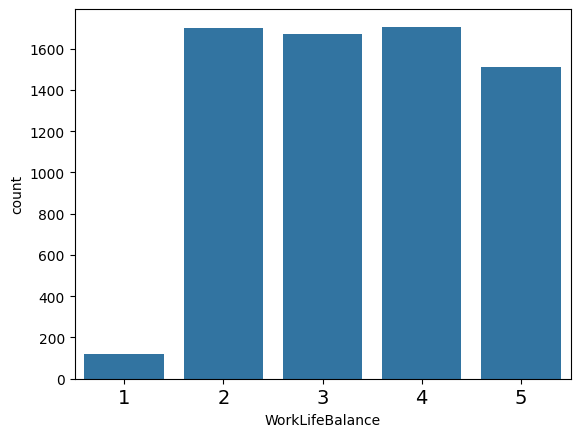

In [83]:
# what is the percentage of different Work Life Balance levels among employees?
sns.countplot(data=HR_Ratings, x='WorkLifeBalance')
plt.xticks(fontsize=14)
plt.show()

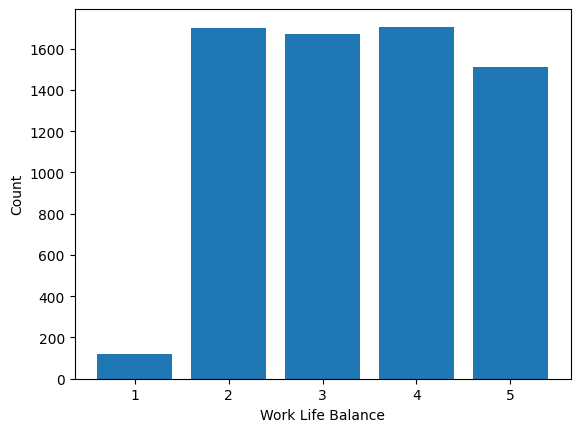

In [84]:
plt.bar(x=HR_Ratings['WorkLifeBalance'].value_counts().index.tolist(),
         height=HR_Ratings['WorkLifeBalance'].value_counts().values.tolist())
plt.xlabel('Work Life Balance')
plt.ylabel('Count')
plt.show()

In [85]:
# How does Business Travel affect Job Satisfaction?
px.histogram(data_frame=HR_Ratings, x='JobSatisfaction_text', color='BusinessTravel', 
              barnorm='percent')

In [86]:
# How does Business Travel affect Environment Satisfaction?
px.histogram(data_frame=HR_Ratings, x='EnvironmentSatisfaction_text', color='BusinessTravel', 
             barnorm='percent')

In [87]:
# How does Business Travel affect Relatonship Satisfaction?
px.histogram(data_frame=HR_Ratings, x='RelationshipSatisfaction_text', color='BusinessTravel', 
              barnorm='percent')

In [88]:
# What is the relationship between self rating and manager rating?
HR_Ratings.groupby(['SelfRating_text','ManagerRating_text'])['PerformanceID'].count().to_frame().rename(columns={'PerformanceID':'Count'})

Count
SelfRating_text     ManagerRating_text        
Above and Beyond    Above and Beyond      1074
                    Exceeds Expectation   1109
Exceeds Expectation Exceeds Expectation   1110
                    Meets Expectation     1126
Meets Expectation   Exceeds Expectation      1
                    Meets Expectation     1097
                    Needs Improvement     1192

In [89]:
# What is the relationship between self rating and manager rating?
px.histogram(data_frame=HR_Ratings, x='SelfRating_text', color='ManagerRating_text')
              

In [90]:
HR_Ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6709 entries, 0 to 6708
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   EmployeeID                       6709 non-null   object
 1   PerformanceID                    6709 non-null   object
 2   FullName                         6709 non-null   object
 3   ReviewDate                       6709 non-null   object
 4   Age                              6709 non-null   int64 
 5   BusinessTravel                   6709 non-null   object
 6   Department                       6709 non-null   object
 7   Attrition                        6709 non-null   object
 8   EnvironmentSatisfaction          6709 non-null   int64 
 9   JobSatisfaction                  6709 non-null   int64 
 10  RelationshipSatisfaction         6709 non-null   int64 
 11  RelationshipSatisfaction_text    6709 non-null   object
 12  EnvironmentSatisfaction_text     6

In [91]:
#Are there significant differences in performance ratings between employees who travel frequently for business and those who do not?

In [92]:
HR_Ratings.groupby('BusinessTravel')[['SelfRating', 'ManagerRating']].mean()


SelfRating  ManagerRating
BusinessTravel                               
Frequent Traveller    3.966127       3.468336
No Travel             3.981997       3.502455
Some Travel           3.989451       3.471097

In [93]:
# How does the average self-rating compare to the average manager rating across different departments?

In [94]:
HR_Ratings.groupby('Department')[['SelfRating', 'ManagerRating']].mean()


SelfRating  ManagerRating
Department                                
Human Resources    3.990099       3.442244
Sales              3.973476       3.449977
Technology         3.988959       3.487432

In [97]:
#What is the correlation between job satisfaction and work-life balance among employees?

In [98]:
HR_Ratings['JobSatisfaction'].corr(HR_Ratings['WorkLifeBalance'])

0.04172429420104633

In [99]:
#How does environment satisfaction impact overall job satisfaction and relationship satisfaction?

In [100]:
HR_Ratings[['EnvironmentSatisfaction', 'JobSatisfaction', 'RelationshipSatisfaction']].corr()

EnvironmentSatisfaction  JobSatisfaction  \
EnvironmentSatisfaction                  1.000000         0.102046   
JobSatisfaction                          0.102046         1.000000   
RelationshipSatisfaction                 0.095539         0.048128   

                          RelationshipSatisfaction  
EnvironmentSatisfaction                   0.095539  
JobSatisfaction                           0.048128  
RelationshipSatisfaction                  1.000000

In [101]:
#How do training opportunities within the year affect self-rated job satisfaction and manager-rated performance?

In [102]:
HR_Ratings.groupby('TrainingOpportunitiesWithinYear')[['SelfRating', 'ManagerRating', 'JobSatisfaction']].mean()

SelfRating  ManagerRating  JobSatisfaction
TrainingOpportunitiesWithinYear                                            
1                                  3.995483       3.484643         3.456640
2                                  3.982224       3.471285         3.439836
3                                  3.974794       3.464581         3.396784

In [103]:
#What trends can be identified regarding employee age and their job satisfaction or performance ratings?

In [104]:
HR_Ratings.groupby('Age')[['JobSatisfaction', 'SelfRating', 'ManagerRating']].mean().sort_values(by="Age",ascending=False)


JobSatisfaction  SelfRating  ManagerRating
Age                                            
51          3.000000    3.000000       2.000000
50          3.600000    3.600000       3.000000
49          4.000000    3.000000       3.000000
48          3.263514    3.939189       3.418919
47          3.524476    4.013986       3.489510
46          3.457447    3.914894       3.319149
45          3.224000    3.872000       3.408000
44          3.618705    4.086331       3.582734
43          3.475000    3.925000       3.445000
42          3.379310    4.075862       3.572414
41          3.387500    3.925000       3.462500
40          3.460526    4.039474       3.532895
39          3.413534    4.000000       3.488722
38          3.476190    3.993197       3.435374
37          3.657407    4.018519       3.490741
36          3.480447    3.932961       3.480447
35          3.584507    4.014085       3.556338
34          3.375940    3.984962       3.481203
33          3.364407    3.966102       3.466102
32          3.425743    4.054455       3.549505
31          3.580882    4.007353       3.448529
30          3.364583    4.006944       3.524306
29          3.376997    3.987220       3.498403
28          3.462585    4.031746       3.510204
27          3.418719    3.945813       3.448276
26          3.457565    3.970480       3.405904
25          3.370805    3.998322       3.486577
24          3.394850    3.920601       3.418455
23          3.371648    3.965517       3.421456
22          3.560510    3.984076       3.512739
21          3.408072    4.026906       3.484305
20          3.426357    3.984496       3.395349
19          3.268293    4.024390       3.585366
18          3.472222    4.055556       3.583333

In [105]:
#Which area (work-life balance, environment satisfaction, job satisfaction, or training opportunities) should the organization focus on?

In [106]:
HR_Ratings[['JobSatisfaction', 'WorkLifeBalance', 'EnvironmentSatisfaction', 'TrainingOpportunitiesWithinYear']].corr()

JobSatisfaction  WorkLifeBalance  \
JobSatisfaction                         1.000000         0.041724   
WorkLifeBalance                         0.041724         1.000000   
EnvironmentSatisfaction                 0.102046         0.098293   
TrainingOpportunitiesWithinYear        -0.021359         0.004277   

                                 EnvironmentSatisfaction  \
JobSatisfaction                                 0.102046   
WorkLifeBalance                                 0.098293   
EnvironmentSatisfaction                         1.000000   
TrainingOpportunitiesWithinYear                -0.005199   

                                 TrainingOpportunitiesWithinYear  
JobSatisfaction                                        -0.021359  
WorkLifeBalance                                         0.004277  
EnvironmentSatisfaction                                -0.005199  
TrainingOpportunitiesWithinYear                         1.000000

In [107]:
Emp_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   EmployeeID               1470 non-null   object
 1   Gender                   1470 non-null   object
 2   Age                      1470 non-null   int64 
 3   BusinessTravel           1470 non-null   object
 4   Department               1470 non-null   object
 5   DistanceFromHome (KM)    1470 non-null   int64 
 6   State                    1470 non-null   object
 7   Ethnicity                1470 non-null   object
 8   EducationField           1470 non-null   object
 9   JobRole                  1470 non-null   object
 10  MaritalStatus            1470 non-null   object
 11  Salary                   1470 non-null   int64 
 12  StockOptionLevel         1470 non-null   int64 
 13  OverTime                 1470 non-null   object
 14  Attrition                1470 non-null  

In [108]:
#What is the average tenure (years at the company) for employees who travel frequently versus those who don’t?

In [109]:
Emp_merge.groupby('BusinessTravel')['YearsAtCompany'].mean()

BusinessTravel
Frequent Traveller    4.223827
No Travel             4.740000
Some Travel           4.627037
Name: YearsAtCompany, dtype: float64

In [110]:
#Does the number of years in the most recent role vary based on whether an employee travels frequently?

In [111]:
Emp_merge.groupby('BusinessTravel')['YearsInMostRecentRole'].mean()

BusinessTravel
Frequent Traveller    2.054152
No Travel             2.420000
Some Travel           2.338447
Name: YearsInMostRecentRole, dtype: float64

In [112]:
#What is the average salary across different job roles, and how does this relate to employee attrition?

In [113]:
Emp_merge.groupby(['JobRole','Attrition'])['Salary'].mean()

JobRole                    Attrition
Analytics Manager          No           345410.734694
                           Yes          364018.000000
Data Scientist             No            57632.582915
                           Yes           51094.580645
Engineering Manager        No           282548.356164
                           Yes          421679.000000
HR Business Partner        No           314002.428571
HR Executive               No            88655.440000
                           Yes          141919.666667
HR Manager                 No           449330.750000
Machine Learning Engineer  No           131145.713235
                           Yes          116821.700000
Manager                    No           315899.571429
                           Yes          346082.000000
Recruiter                  No            39330.133333
                           Yes           34843.111111
Sales Executive            No           114627.840741
                           Yes          12935